<a href="https://colab.research.google.com/github/RavinduHiroshan/Real-and-Synthetic-image-classification/blob/main/Model_Evaluator_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modal Evaluator**





In [ ]:
# loading library
import pickle
import tensorflow as tf
import glob
import PIL

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Load Model Files

---
Model shuld be saved inside 


Create Short cut on my drive 



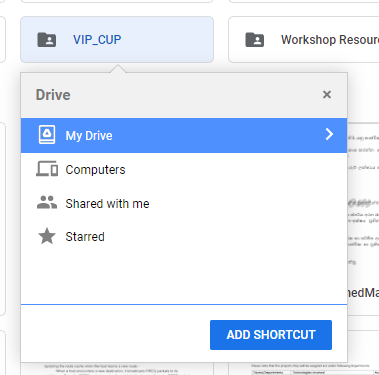





In [ ]:
###### File name of the model #####
filename= 'Glide_Version_1_Model_6.pkl'
##
dir = '/content/drive/MyDrive/VIP_CUP/Models/'
model = pickle.load(open(dir+filename , 'rb')) 

# **Load Data Set**

note- Order of the classnames should be corrected according to the training dataset

In [ ]:
###### Folder Name #####
dataSet = 'Glide/Test'
##########################
dirToData = '/content/drive/My Drive/VIP_CUP/'
test = tf.keras.preprocessing.image_dataset_from_directory(
      dirToData+dataSet,
      labels = "inferred",
      label_mode = "categorical",
      color_mode = "rgb",
      image_size = (224,224),
      class_names = ['Synthetic','real']
)
classnames = test.class_names
print(classnames)

Found 1434 files belonging to 2 classes.
['Synthetic', 'real']


Model Test Results

In [ ]:
#Result According to tf function
result = model.evaluate(test,batch_size=64)
print('Loss =',result[0],'Accuracy =',result[1])

45/45 [==============================] - 83s 2s/step - loss: 0.8008 - accuracy: 0.8543
Loss = 0.8007570505142212 Accuracy = 0.8542538285255432


In [ ]:
###### Folder Name #####
dataSet = 'Glide/Test/Synthetic/'
img = 'annot000000114943.png' 
##########################
dirToData = '/content/drive/My Drive/VIP_CUP/'
import numpy as np
test_image = tf.keras.utils.load_img(dirToData+dataSet+img,target_size=(224,224))
test_image =  tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(test_image.shape)
print(result)

(1, 224, 224, 3)
[[9.9997211e-01 2.7906692e-05]]


In [ ]:
###### Folder Name #####
dataSet = 'Glide/Test/'
##########################
dirToData = '/content/drive/My Drive/VIP_CUP/'
filelistreal = glob.glob(dirToData+dataSet+'real/*.jpg')
xreal = np.array([np.array(tf.keras.utils.load_img(fname,target_size=(224,224))) for fname in filelistreal])
filelistsyn = glob.glob(dirToData+dataSet+'Synthetic/*.png')
xsyn = np.array([np.array(tf.keras.utils.load_img(fname,target_size=(224,224))) for fname in filelistsyn])

In [ ]:
retotal=0
retrue=0
#result[0][0] is the synthetic output 
#clase name shold be class_names = ['Synthetic','real']
for i in xreal:
  i =  tf.keras.utils.img_to_array(i)
  i = np.expand_dims(i, axis = 0)
  result = model.predict(i)
  retotal+=1
  if result[0][0] < result[0][1]:
    retrue+=1
for i in xsyn:
  i =  tf.keras.utils.img_to_array(i)
  i = np.expand_dims(i, axis = 0)
  result = model.predict(i)
  retotal+=1
  if result[0][0] > result[0][1]:
    retrue+=1

In [ ]:
print('Accuracy =',retrue/retotal)